In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

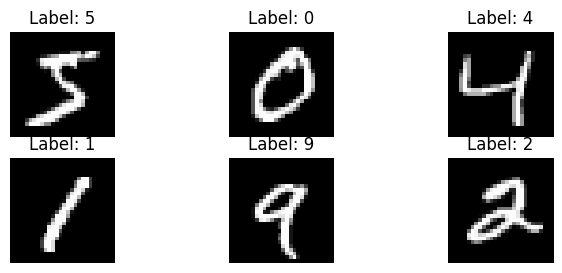

In [4]:
#  first 6 images
plt.figure(figsize=(8,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
# Defining a Simple Neural Network
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8460 - loss: 0.5505 - val_accuracy: 0.9475 - val_loss: 0.1856
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9498 - loss: 0.1708 - val_accuracy: 0.9554 - val_loss: 0.1489
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9669 - loss: 0.1131 - val_accuracy: 0.9664 - val_loss: 0.1150
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9754 - loss: 0.0848 - val_accuracy: 0.9699 - val_loss: 0.0976
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9813 - loss: 0.0638 - val_accuracy: 0.9721 - val_loss: 0.0926


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1035
Test accuracy: 0.9722


In [8]:
# Make Predictions
predictions = model.predict(x_test[:5])
for i, pred in enumerate(predictions):
    print(f"Image {i}: predicted {np.argmax(pred)}, actual {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Image 0: predicted 7, actual 7
Image 1: predicted 2, actual 2
Image 2: predicted 1, actual 1
Image 3: predicted 0, actual 0
Image 4: predicted 4, actual 4


In [14]:
# Extension
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape (required for Conv2D and data augmentation)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

x_train = np.expand_dims(x_train, -1)  # (28,28,1)
x_test  = np.expand_dims(x_test, -1)

# Class names for better predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


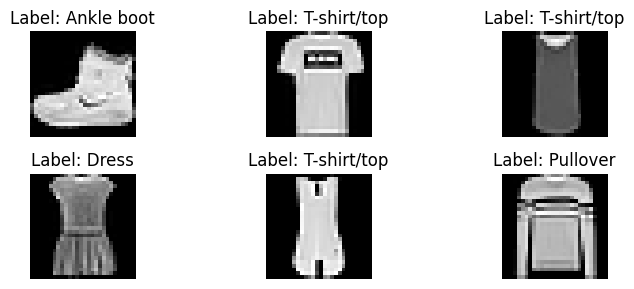

In [15]:
plt.figure(figsize=(8,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2  # 20% for validation
)

# Fit to data (not required but safe to do)
datagen.fit(x_train)


In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    datagen.flow(x_train, y_train, subset='training', batch_size=64),
    validation_data=datagen.flow(x_train, y_train, subset='validation'),
    epochs=5
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.7343 - loss: 0.6996 - val_accuracy: 0.7889 - val_loss: 0.5388
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.7698 - loss: 0.6010 - val_accuracy: 0.8010 - val_loss: 0.5042
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 74ms/step - accuracy: 0.7875 - loss: 0.5537 - val_accuracy: 0.8236 - val_loss: 0.4517
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8033 - loss: 0.5162 - val_accuracy: 0.8387 - val_loss: 0.4287
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.8245 - loss: 0.4775 - val_accuracy: 0.8536 - val_loss: 0.3853


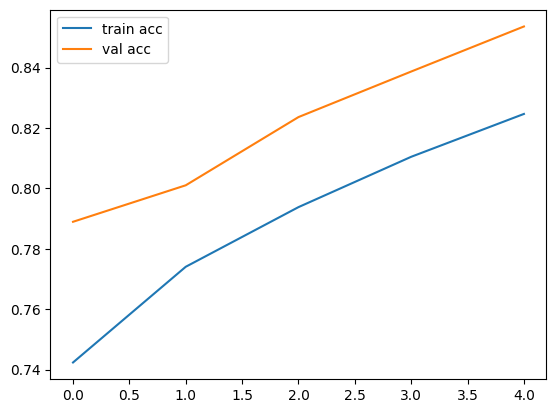

In [21]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

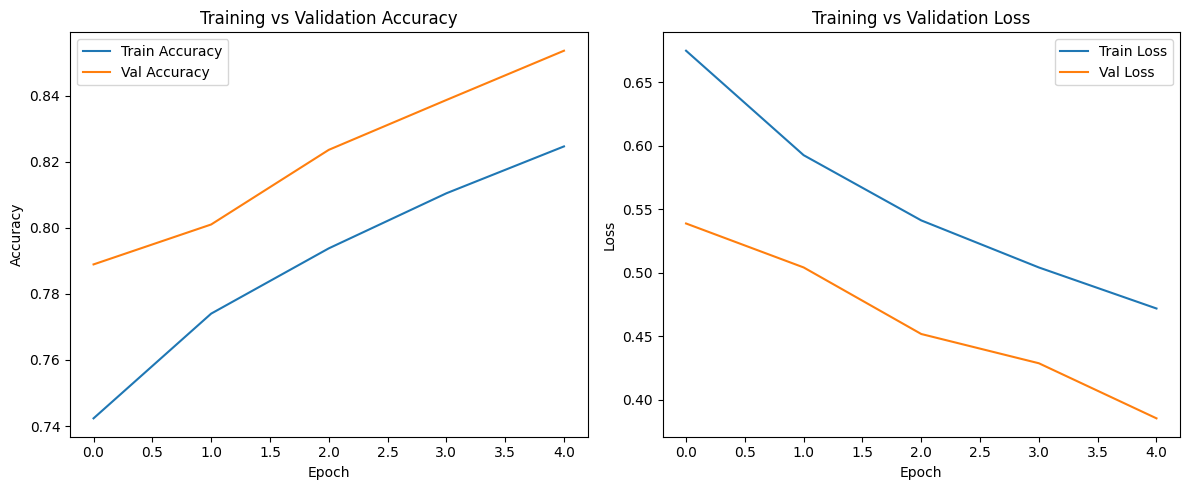

In [22]:
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict and display
predictions = model.predict(x_test[:5])
for i, pred in enumerate(predictions):
    predicted_label = class_names[np.argmax(pred)]
    actual_label = class_names[y_test[i]]
    print(f"Image {i}: Predicted = {predicted_label}, Actual = {actual_label}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8732 - loss: 0.3522
Test accuracy: 0.8690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Image 0: Predicted = Ankle boot, Actual = Ankle boot
Image 1: Predicted = Pullover, Actual = Pullover
Image 2: Predicted = Trouser, Actual = Trouser
Image 3: Predicted = Trouser, Actual = Trouser
Image 4: Predicted = Shirt, Actual = Shirt
